In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install face_recognition

In [3]:
import glob
fn = glob.glob("/gdrive/My Drive/face_samples/*")
fn

['/gdrive/My Drive/face_samples/yui.jfif',
 '/gdrive/My Drive/face_samples/chiling.jfif',
 '/gdrive/My Drive/face_samples/godtone.jfif',
 '/gdrive/My Drive/face_samples/han.png',
 '/gdrive/My Drive/face_samples/tsai.png',
 '/gdrive/My Drive/face_samples/sung.jfif']

128維度: [-0.01618614  0.12676561  0.04101241 -0.08212977 -0.10170147  0.06399666
 -0.08012764 -0.06920892  0.19565965 -0.16311914  0.24629004 -0.03446779
 -0.23793235 -0.0071743  -0.01288929  0.18573496 -0.19027288 -0.19959813
 -0.00850716  0.08744159  0.06879297  0.06583901 -0.02882146  0.00756061
 -0.148922   -0.37328854 -0.13069993 -0.01483572 -0.03284116 -0.05287176
 -0.01949585  0.01886426 -0.18371367  0.03054175  0.09599811  0.1317426
 -0.04212451 -0.10267353  0.13553175  0.03385166 -0.32884607  0.05492638
  0.09521761  0.22434291  0.10832208  0.0291515  -0.02448029 -0.16104543
  0.08472552 -0.17127918  0.07728669  0.19224238  0.08560663  0.09292373
  0.03953454 -0.14626525  0.00909577  0.14718589 -0.11433884 -0.01110617
  0.09750497 -0.02510362  0.05007994 -0.12971154  0.16745317  0.07531139
 -0.11142019 -0.23919816  0.11579248 -0.13103642 -0.10406461  0.13709959
 -0.1812427  -0.24179767 -0.23609197  0.02684955  0.35778236  0.15238695
 -0.13877058  0.03095979  0.0372891  -0.01165

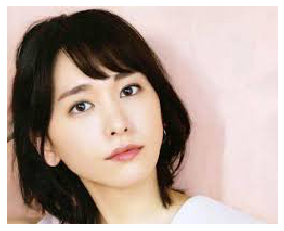

In [6]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = fn[0]
img = face_recognition.load_image_file(img)
en = face_recognition.face_encodings(img)[0]
print("128維度:", en)
plt.axis("off")
plt.imshow(img)

In [9]:
import os
os.path.split(fn[0])

('/gdrive/My Drive/face_samples', 'yui.jfif')

In [12]:
import pandas as pd
en_list = []
name_list = []
for f in fn:
    print(f)
    img = face_recognition.load_image_file(f)
    en = face_recognition.face_encodings(img)[0]
    name = os.path.split(f)[-1].split(".")[0]
    en_list.append(list(en))
    name_list.append(name)
df = pd.DataFrame({
    "Name":name_list,
    "Encoding":en_list
})
df.to_csv("/gdrive/My Drive/face.csv",
          encoding="utf-8",
          index=False)
df

,Name,Encoding
0,yui,"[-0.016186142340302467, 0.12676560878753662, 0..."
1,chiling,"[-0.062357012182474136, 0.07992753386497498, 0..."
2,godtone,"[-0.0743037685751915, 0.04049310460686684, 0.0..."
3,han,"[-0.03891788795590401, 0.1053115651011467, 0.0..."
4,tsai,"[-0.07444756478071213, 0.034980595111846924, 0..."
5,sung,"[-0.03319423273205757, 0.10047262161970139, 0...."


In [13]:
# 真的在用的時候 從這開始
face_df = pd.read_csv("/gdrive/My Drive/face.csv")
face_df

,Name,Encoding
0,yui,"[-0.016186142340302467, 0.12676560878753662, 0..."
1,chiling,"[-0.062357012182474136, 0.07992753386497498, 0..."
2,godtone,"[-0.0743037685751915, 0.04049310460686684, 0.0..."
3,han,"[-0.03891788795590401, 0.1053115651011467, 0.0..."
4,tsai,"[-0.07444756478071213, 0.034980595111846924, 0..."
5,sung,"[-0.03319423273205757, 0.10047262161970139, 0...."


In [0]:
import json
faces = list(face_df["Encoding"].apply(lambda x:json.loads(x)))
names = list(face_df["Name"])

輸入網址:https://www.nownews.com/wp-content/uploads/2019/04/1556615483-c565ed99e27fe1b2620e7a0d7b9d5ab1.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


這應該是: tsai
跟 yui 的距離: 0.49714069178880027
跟 chiling 的距離: 0.4860406705829369
跟 godtone 的距離: 0.6495798704296197
跟 han 的距離: 0.6541235702487845
跟 tsai 的距離: 0.45292699453187035
跟 sung 的距離: 0.7325451756608934


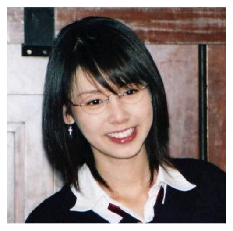

In [33]:
import requests
url = input("輸入網址:")
response = requests.get(url, stream=True, verify=False)
testimg = face_recognition.load_image_file(response.raw)
testen = face_recognition.face_encodings(testimg)[0]
distance = face_recognition.face_distance(testen, faces)
if min(distance) > 0.5:
    print("沒有匹配的人")
else:
    ans = names[distance.argmin()]
    print("這應該是:", ans)
for n, d in zip(names, distance):
    print("跟", n, "的距離:", d)
plt.axis("off")
plt.imshow(testimg)